<a href="https://colab.research.google.com/github/brrikcy/Anomaly-Detection/blob/main/Anomaly_Detection_using_Multiple_Gaussian_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [20]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

IMPORTING DATASET

In [21]:
data=pd.read_csv('/content/drive/MyDrive/DATASETS/Bank transactions.csv')
data

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,Saturday,C,H,WHH
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,Saturday,C,H,WHH
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,Saturday,C,H,WHH
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,Saturday,C,H,WHH
...,...,...,...,...,...,...,...,...,...,...,...,...
11584,Big Street ATM,29-09-2017,137,34,103,468800,146200,322600,FRIDAY,H,H,WHH
11585,Mount Road ATM,29-09-2017,79,27,52,305100,172500,132600,FRIDAY,H,H,WHH
11586,Airport ATM,29-09-2017,117,77,40,709900,576800,133100,FRIDAY,H,H,WHH
11587,KK Nagar ATM,29-09-2017,76,48,28,408700,279900,128800,FRIDAY,H,H,WHH


DATA PREPROCESSING

In [22]:
# Parsing Dates
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], dayfirst=True,format='mixed')


# Encoding Categorical Variables
categorical_columns = ['ATM Name', 'Weekday', 'Festival Religion', 'Working Day', 'Holiday Sequence']
data_encoded = pd.get_dummies(data, columns=categorical_columns)


# Handling Missing Values
data_encoded.fillna(method='ffill', inplace=True)


# Handling Duplicate values
data_encoded.drop_duplicates(inplace=True)


#Scaling Numerical Features
numerical_columns = ['No Of Withdrawals', 'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
                     'Total amount Withdrawn', 'Amount withdrawn XYZ Card', 'Amount withdrawn Other Card']

scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

DISPLAYING PREPROCESSED DATA

In [23]:
data_encoded

,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,ATM Name_Airport ATM,ATM Name_Big Street ATM,ATM Name_Christ College ATM,...,Working Day_H,Working Day_W,Holiday Sequence_HHH,Holiday Sequence_HHW,Holiday Sequence_HWH,Holiday Sequence_HWW,Holiday Sequence_WHH,Holiday Sequence_WHW,Holiday Sequence_WWH,Holiday Sequence_WWW
0,2011-01-01,-1.089563,-0.994153,-0.669355,-1.226917,-1.185351,-0.703232,False,True,False,...,True,False,False,False,False,False,True,False,False,False
1,2011-01-01,1.926227,-0.011865,3.382086,0.756133,-0.257665,2.058559,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,2011-01-01,-0.376470,-0.241762,-0.357706,-0.058207,0.053183,-0.213312,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,2011-01-01,2.104500,1.910913,1.304424,1.302311,0.801564,1.497414,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,2011-01-01,-0.733017,-0.889654,-0.175911,-0.722303,-0.754292,-0.321147,False,False,True,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11584,2017-09-29,0.202918,-0.701557,1.226511,-0.164733,-0.762387,0.897662,False,True,False,...,True,False,False,False,False,False,True,False,False,False
11585,2017-09-29,-0.658736,-0.847855,-0.097998,-0.668732,-0.655938,-0.367077,False,False,False,...,True,False,False,False,False,False,True,False,False,False
11586,2017-09-29,-0.094204,0.197133,-0.409648,0.577563,0.980464,-0.363749,True,False,False,...,True,False,False,False,False,False,True,False,False,False
11587,2017-09-29,-0.703304,-0.408960,-0.721297,-0.349769,-0.221237,-0.392372,False,False,False,...,True,False,False,False,False,False,True,False,False,False


TRAINING THE MODEL

In [24]:
#intitializing the model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)

# Fitting the model
gmm.fit(data_encoded[numerical_columns])

GaussianMixture(n_components=2, random_state=42)

DETECTING ANOMALIES

In [32]:
# Computing the probability of each data point
data_encoded['probability'] = gmm.score_samples(data_encoded[numerical_columns])

# Setting a threshold to identify anomalies
threshold = data_encoded['probability'].quantile(0.05)

#Creating a new column 'Anomalies' indicating True if Anomaly
data_encoded['anomaly'] = data_encoded['probability'] < threshold

#saving all anomalies at one place
anomalies = data_encoded[data_encoded['anomaly']]

DISPLAYING ANOMALIES

In [35]:
anomalies

,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,ATM Name_Airport ATM,ATM Name_Big Street ATM,ATM Name_Christ College ATM,...,Holiday Sequence_HHH,Holiday Sequence_HHW,Holiday Sequence_HWH,Holiday Sequence_HWW,Holiday Sequence_WHH,Holiday Sequence_WHW,Holiday Sequence_WWH,Holiday Sequence_WWW,probability,anomaly
1,2011-01-01,1.926227,-0.011865,3.382086,0.756133,-0.257665,2.058559,False,False,False,...,False,False,False,False,True,False,False,False,2.799254,True
8,2011-01-02,2.030219,1.827314,1.278453,0.883903,0.492336,1.101351,False,False,False,...,False,True,False,False,False,False,False,False,4.058458,True
41,2011-01-09,2.787881,-0.367160,5.329894,0.706565,-0.474206,2.307513,False,False,False,...,False,True,False,False,False,False,False,False,-11.352657,True
51,2011-01-11,1.614248,0.552429,2.135489,-0.050202,-0.294497,0.375790,False,False,False,...,False,False,False,False,False,False,False,True,2.413027,True
56,2011-01-12,1.658817,0.510629,2.265343,0.385755,0.115109,0.644714,False,False,False,...,False,False,False,False,False,False,False,True,3.234068,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11558,2017-09-23,1.985651,-0.011865,3.485969,2.249963,0.451051,4.122746,False,False,True,...,False,False,False,False,True,False,False,False,3.588112,True
11567,2017-09-25,0.336623,0.510629,-0.046057,2.010126,2.170832,0.775847,False,False,False,...,False,False,False,True,False,False,False,False,1.650137,True
11572,2017-09-26,-0.480463,-0.011865,-0.825180,0.664693,1.134673,-0.428983,False,False,False,...,False,False,False,False,False,False,False,True,3.528244,True
11577,2017-09-27,-0.094204,0.468830,-0.747268,1.463948,2.178117,-0.417001,False,False,False,...,False,False,False,False,False,False,False,True,0.362790,True


VISUALIZATION OF NORMAL AND ANOMALY DATA

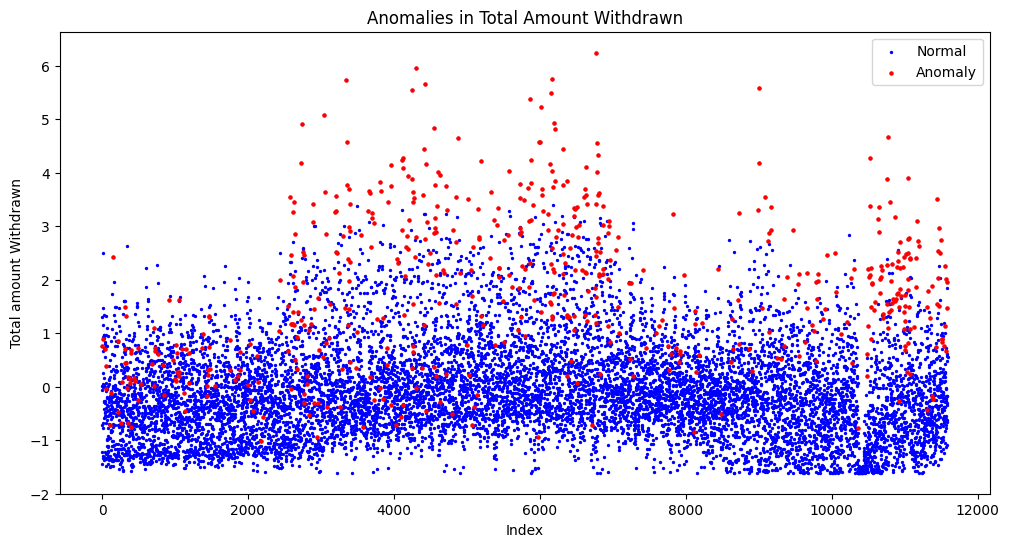

In [33]:
# Scatter plot to visualize anomalies
plt.figure(figsize=(12, 6))
plt.scatter(data_encoded.index, data_encoded['Total amount Withdrawn'], label='Normal', color='blue', s=2)
plt.scatter(anomalies.index, anomalies['Total amount Withdrawn'], label='Anomaly', color='red', s=5)
plt.xlabel('Index')
plt.ylabel('Total amount Withdrawn')
plt.title('Anomalies in Total Amount Withdrawn')
plt.legend()

plt.show()